In [1]:
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def request_raytracer(file, sr, sc, wr, wc, roff, coff):
    x = urllib.request.urlopen("http://localhost/r.html?f=%s&sc=%d&sr=%d&wr=%d&wc=%d&roff=%d&coff=%d" % (file, sr, sc, wr, wc, roff, coff)).read()
    return int(x)

In [ ]:
d = request_raytracer('wood.txt', 100, 100, 50, 50, 0, 50)

In [ ]:
cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % d)

In [ ]:
cols.loc[cols['description'] == 'shade']

In [12]:
mapping = {}
resolution = (100, 100)
grid = (20,20)
file = "wood.txt"
for roff in range(grid[0]):
    for coff in range(grid[1]):
        wr = resolution[0]/grid[0]
        wc = resolution[1]/grid[1]
        x = request_raytracer(file, resolution[0], resolution[1], wr, wc, wr*roff, wc*coff)
        mapping[(roff, coff)] = x

In [27]:
def get_statistics(feature):
    output = np.zeros(shape=(grid[1], grid[0]))
    for key in mapping:
        x = key[1]
        y = grid[0] - key[0] - 1
        cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % mapping[key])
        value = cols.loc[cols['description'] == feature]['value']
        output[x, y] = value
    return output.T/output.max()

In [34]:
normalized_output = get_statistics('getColor')

In [35]:
plt.subplot(1,2,1)
imgplot = plt.imshow(normalized_output)
plt.subplot(1,2,2)
img=mpimg.imread('woodfinal.bmp')/255
plt.imshow(img)

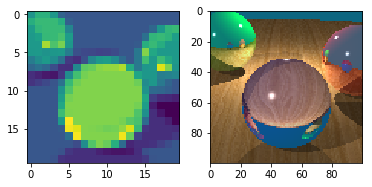

In [36]:

plt.show()

In [ ]:
print(mapping)